<a href="https://colab.research.google.com/github/MansurPro/walmart_dataset/blob/main/walmart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import data

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

data_set_url = "https://raw.githubusercontent.com/MansurPro/walmart_dataset/main/Walmart.csv"
data = pd.read_csv(data_set_url)

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Data review (5 rows)
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


* Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events -> <br /> Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br /> Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br /> Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br /> Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [111]:
print('\n\033[1mInference:\033[0m The Datset consists of {} features (columns) & {} samples (rows).'.format(data.shape[1], data.shape[0]))


Inference: The Datset consists of 8 features (columns) & 6435 samples (rows).


In [112]:
#Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


- Not all of data is integer or float (numbers), there is one Date Object, let's convert it to numbers

In [113]:
# Reframing the columns

data.Date=pd.to_datetime(data.Date)

data['weekday'] = data.Date.dt.weekday
data['month'] = data.Date.dt.month
data['year'] = data.Date.dt.year

# df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
#                                       8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

data.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in data.columns if i not in [target]]
original_df = data.copy(deep=True)

data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [114]:
#Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


## ChecKing Missing Value

In [115]:
# dataset cleaning if there are NaN values
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

- No missing values (or Null), so great for further analysis

In [116]:
### Checking Duplicates Values
data.duplicated().sum()

0

## Featuere Engineerin

In [117]:
# save original dataset (we may manipulate dataset later)
original_data = data.copy(deep=True)

In [118]:
target = 'Weekly_Sales'
features = [i for i in data.columns if i not in [target]]
original_df = data.copy(deep=True)

data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [119]:
#Checking number of unique rows in each feature

data.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [120]:
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 5 categorical features.


In [126]:
#Checking the stats of all the columns

display(data.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


# 2. Exploratory Data Analysis (EDA)




<Figure size 800x400 with 0 Axes>

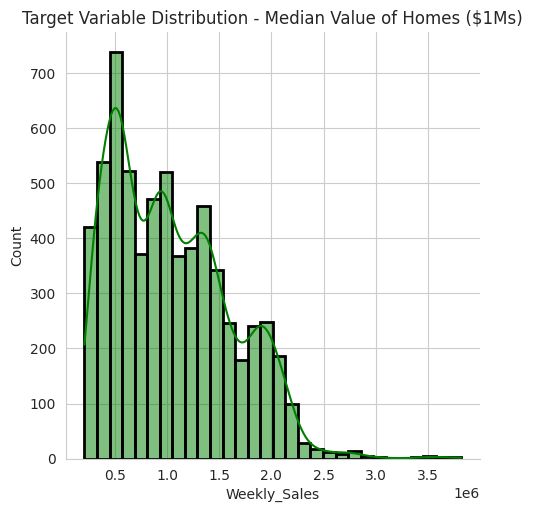

In [127]:
#Let us first analyze the distribution of the target variable
target = 'Weekly_Sales'
plt.figure(figsize=[8,4])
sns.displot(data=data, x=target, color='g', kde=True, bins=30, edgecolor="black", linewidth=2)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

- Distribution analysis of key numerical features.

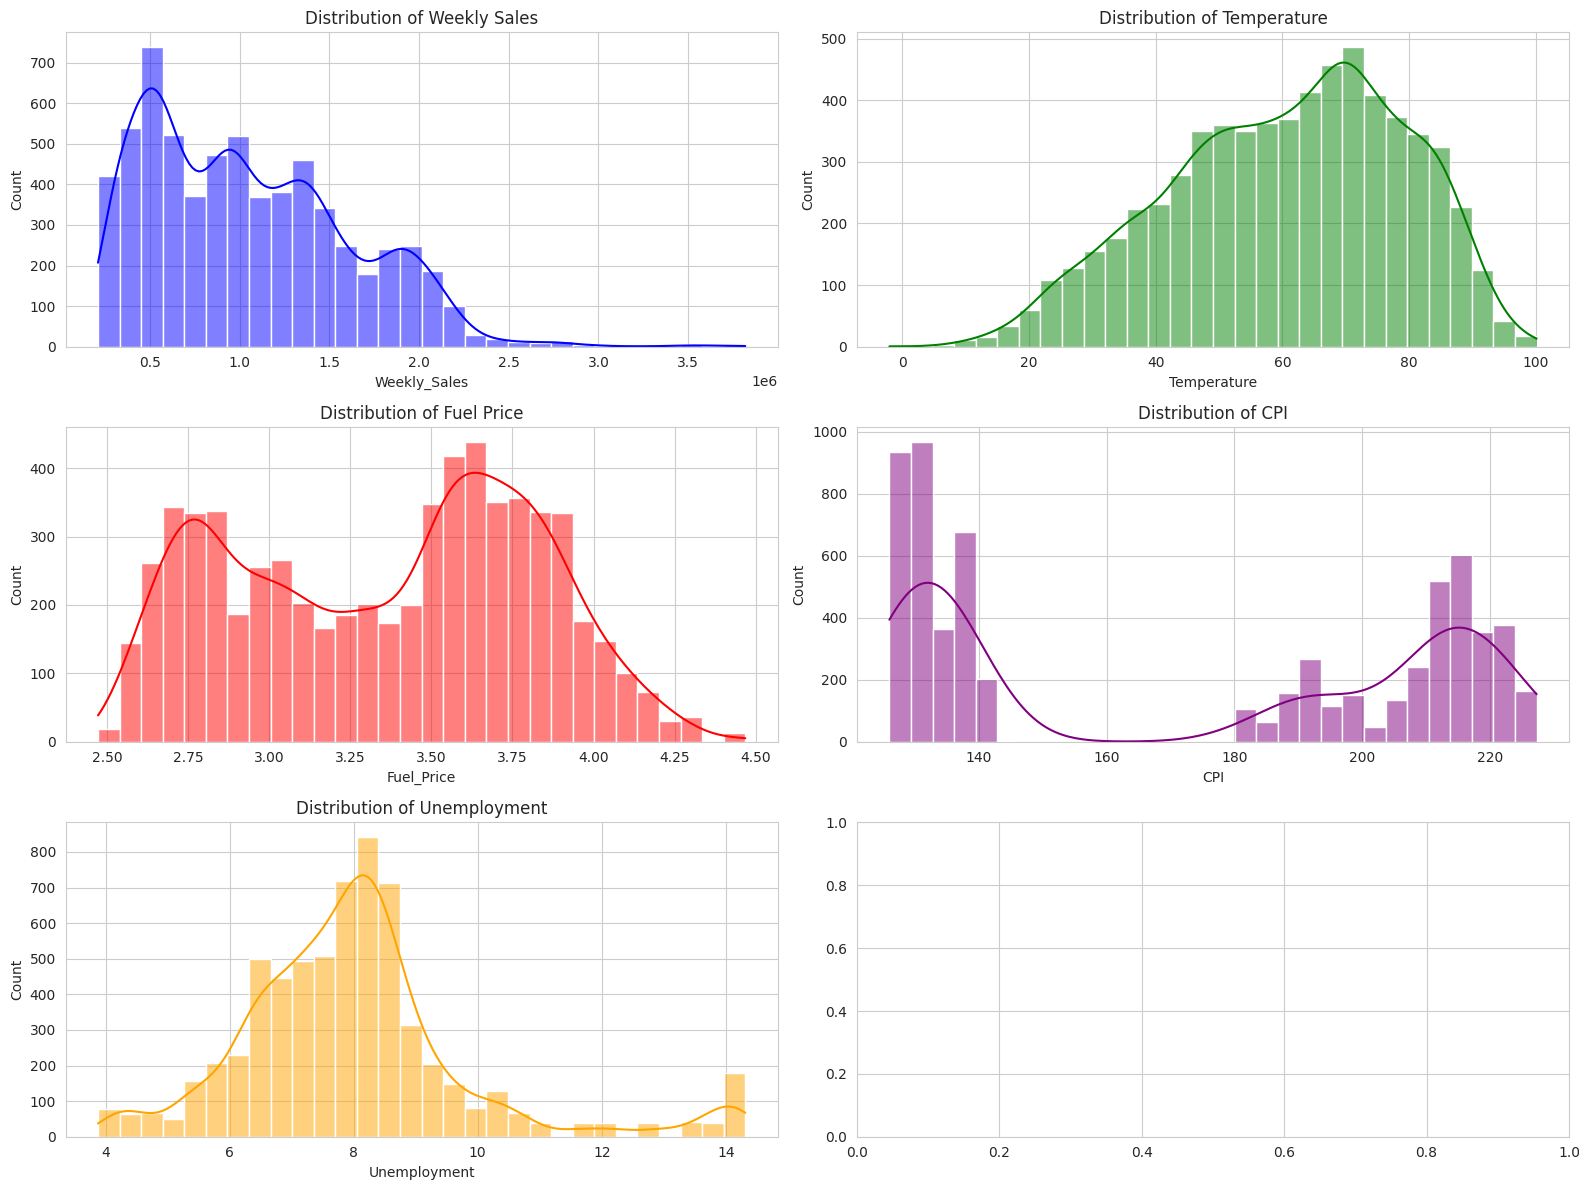

In [128]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution Analysis of key numerical features
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

# Weekly Sales Distribution
sns.histplot(data['Weekly_Sales'], bins=30, kde=True, ax=ax[0, 0], color='blue')
ax[0, 0].set_title('Distribution of Weekly Sales')

# Temperature Distribution
sns.histplot(data['Temperature'], bins=30, kde=True, ax=ax[0, 1], color='green')
ax[0, 1].set_title('Distribution of Temperature')

# Fuel Price Distribution
sns.histplot(data['Fuel_Price'], bins=30, kde=True, ax=ax[1, 0], color='red')
ax[1, 0].set_title('Distribution of Fuel Price')

# CPI Distribution
sns.histplot(data['CPI'], bins=30, kde=True, ax=ax[1, 1], color='purple')
ax[1, 1].set_title('Distribution of CPI')

# Unemployment Distribution
sns.histplot(data['Unemployment'], bins=30, kde=True, ax=ax[2, 0], color='orange')
ax[2, 0].set_title('Distribution of Unemployment')

plt.tight_layout()
plt.show()


Conclusion:
* weekly_sales is right skewed
* Temp and unemployment are normal dist.
* CPI and Fuel_Price have bimodal distribution.

## Holidays Flag



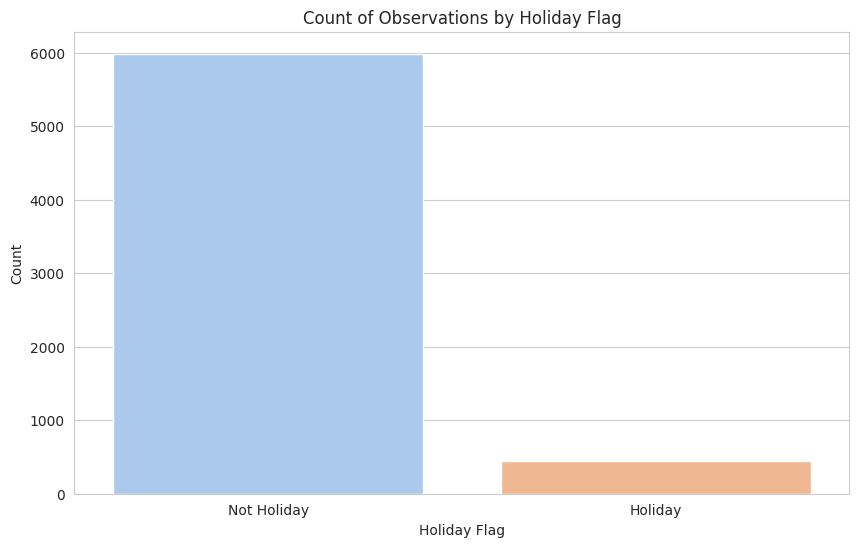

In [129]:
sns.countplot(data=data, x="Holiday_Flag", palette='pastel')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.title('Count of Observations by Holiday Flag')
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])

plt.show()

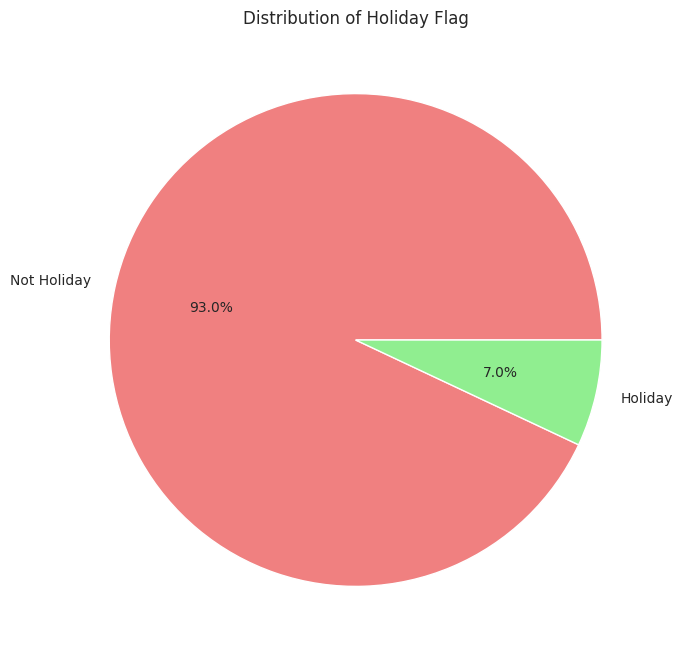

In [130]:
# Create a pie chart
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data['Holiday_Flag'].value_counts(), labels=['Not Holiday', 'Holiday'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Holiday Flag')
plt.show()

Conclusion: Seems like a normal situation as the holiday percentage is 7

## Year

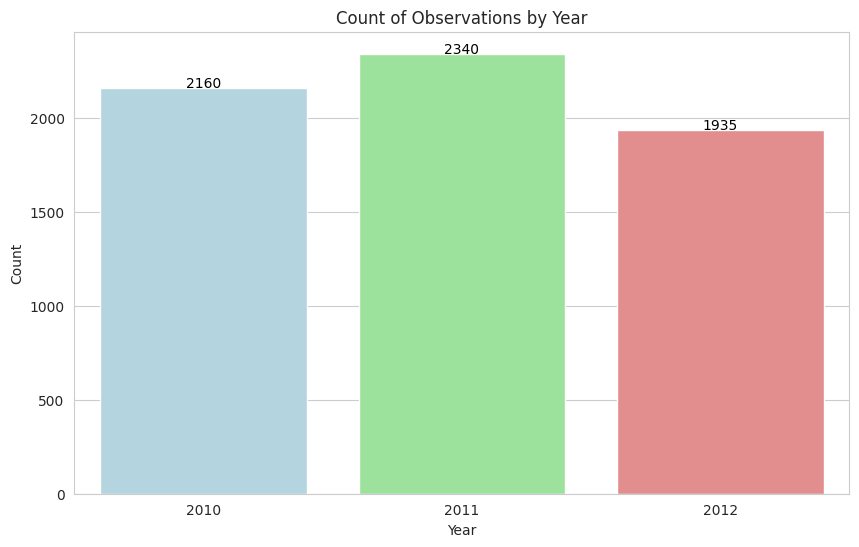

In [131]:
year_counts = data['year'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(data=data, x='year', ax=ax, palette=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])

# Annotate the exact count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

plt.title('Count of Observations by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

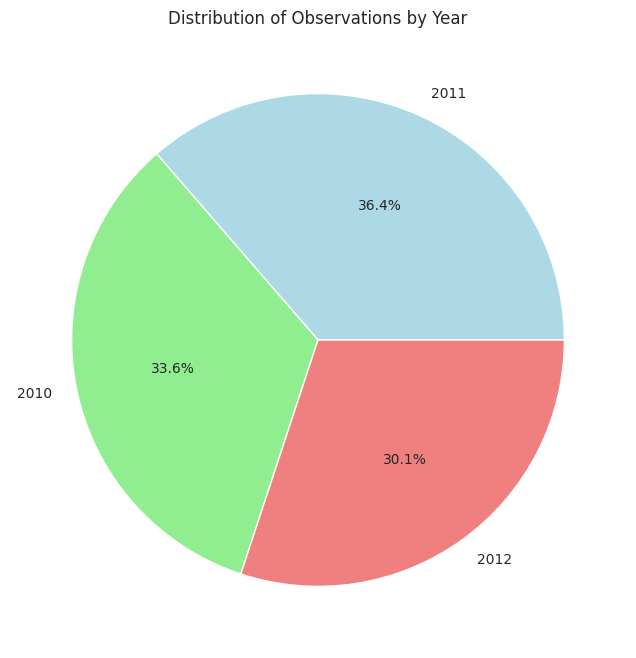

In [132]:
year_counts = data['year'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Distribution of Observations by Year')
plt.show()

* Conclusion: 2011 is the most frequent in the dataset because most of the weekly sales were recorded during this year.

In [133]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


## Month

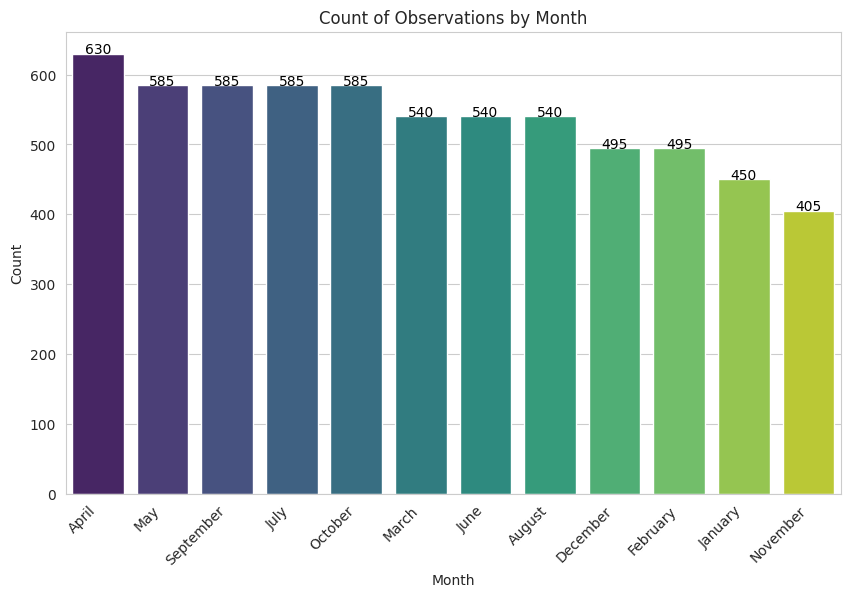

In [134]:
# Mapping numerical month to month names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
data['month_name'] = data['month'].map(month_mapping)

# Plotting the count of observations by month with the exact count values annotated on top of each bar
fig, ax = plt.subplots(figsize=(10, 6))
order = data['month_name'].value_counts().index
sns.countplot(data=data, x='month_name', ax=ax, order=order, palette='viridis')

# Annotate the exact count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.title('Count of Observations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


* April is the most frequent in the dataset because most of the weekly sales were recorded in these months**

## Store

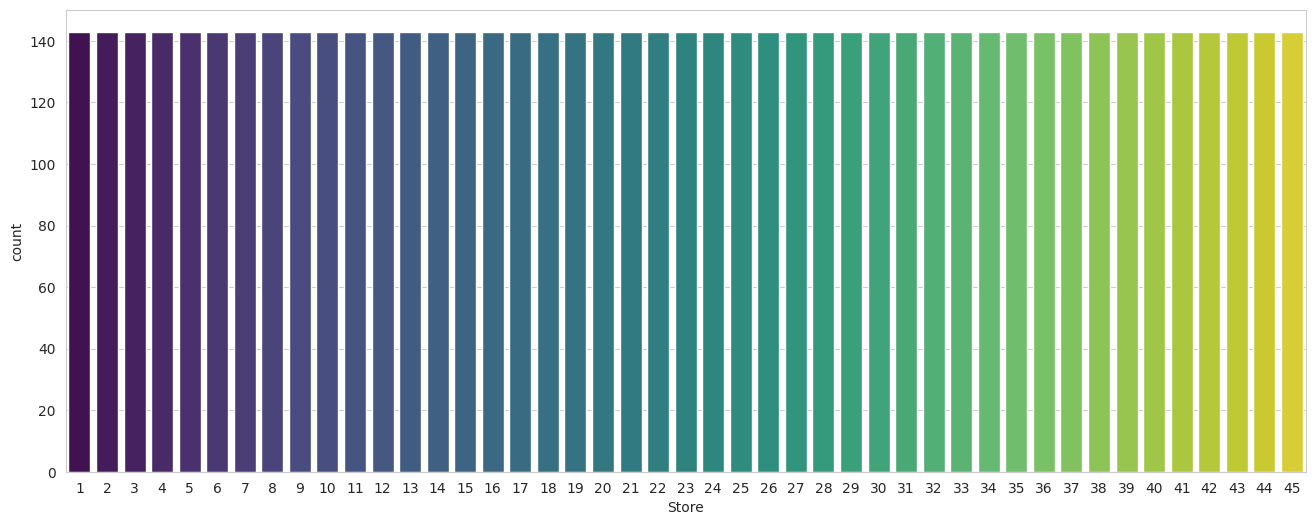

In [135]:
plt.figure(figsize=(16, 6))
sns.countplot(data=data, x='Store', palette='viridis')
plt.show()


* Conclusion:All stores are frequent with the same count in the dataset.

## Bi-Variate Analysis

* Weekly_sales VS Holidays Flag

In [136]:
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

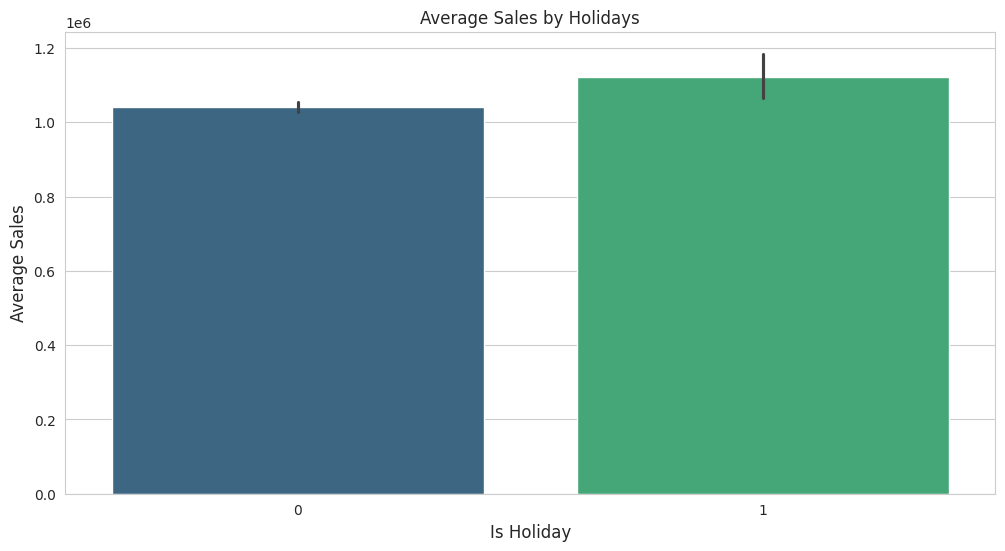

In [137]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data,
            x='Holiday_Flag',
            y='Weekly_Sales',
            estimator=np.mean,
            palette='viridis')

plt.title('Average Sales by Holidays')
plt.xlabel('Is Holiday', size=12)
plt.ylabel('Average Sales', size=12)
plt.show()

In [138]:
data.head(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,month_name
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010,May
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010,December
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,February
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,February
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010,May


* Q2: What are the average sales on holidays and regular days?¶

In [139]:
data.groupby('Holiday_Flag')['Weekly_Sales'].sum()

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

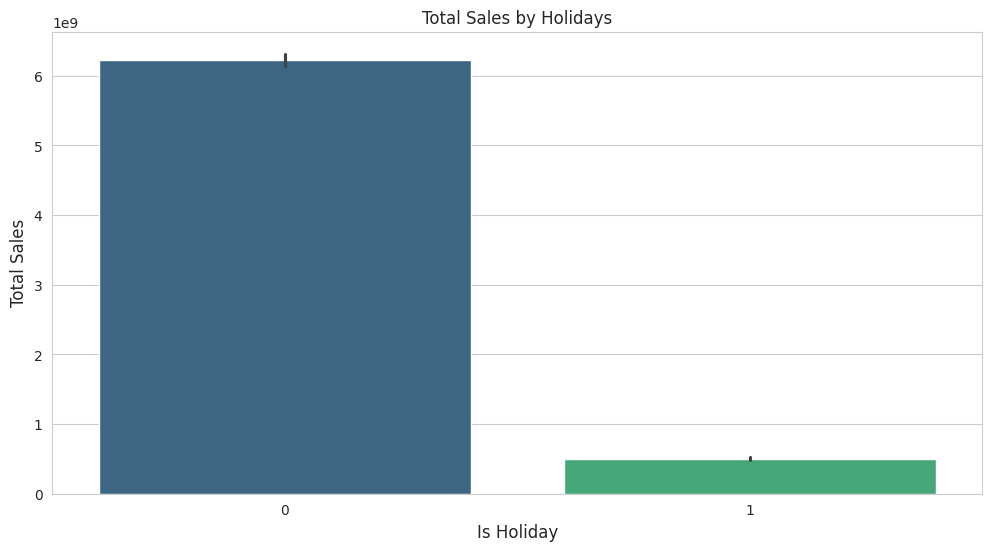

In [140]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data,
            x = 'Holiday_Flag',
            y = 'Weekly_Sales',
            estimator = np.sum,
            palette='viridis')

# Add labels and title
plt.title('Total Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Total Sales', size = 12)
plt.show()

* The rate of sales on holidays is higher than on other days.
* Total sales on holidays are lower than on other days, which is normal because the number of holidays is very small compared with the number of other days

## Weakly Sales Vs Store

In [141]:
data.head(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,month_name
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010,May
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010,December
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,February
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,February
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010,May


In [142]:
grp_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)

grp_store_formatted = grp_store.map('{:,.2f}'.format)

print(grp_store_formatted)

Store
20    301,397,792.46
4     299,543,953.38
14    288,999,911.34
13    286,517,703.80
2     275,382,440.98
10    271,617,713.89
27    253,855,916.88
6     223,756,130.64
1     222,402,808.85
39    207,445,542.47
19    206,634,862.10
31    199,613,905.50
23    198,750,617.85
24    194,016,021.28
11    193,962,786.80
28    189,263,680.58
41    181,341,934.89
32    166,819,246.16
18    155,114,734.21
22    147,075,648.57
12    144,287,230.15
26    143,416,393.79
34    138,249,763.00
40    137,870,309.79
35    131,520,672.08
8     129,951,181.13
17    127,782,138.83
45    112,395,341.42
21    108,117,878.92
25    101,061,179.17
43     90,565,435.41
15     89,133,683.92
7      81,598,275.14
42     79,565,752.43
9      77,789,218.99
29     77,141,554.31
16     74,252,425.40
37     74,202,740.32
30     62,716,885.12
3      57,586,735.07
38     55,159,626.42
36     53,412,214.97
5      45,475,688.90
44     43,293,087.84
33     37,160,221.96
Name: Weekly_Sales, dtype: object


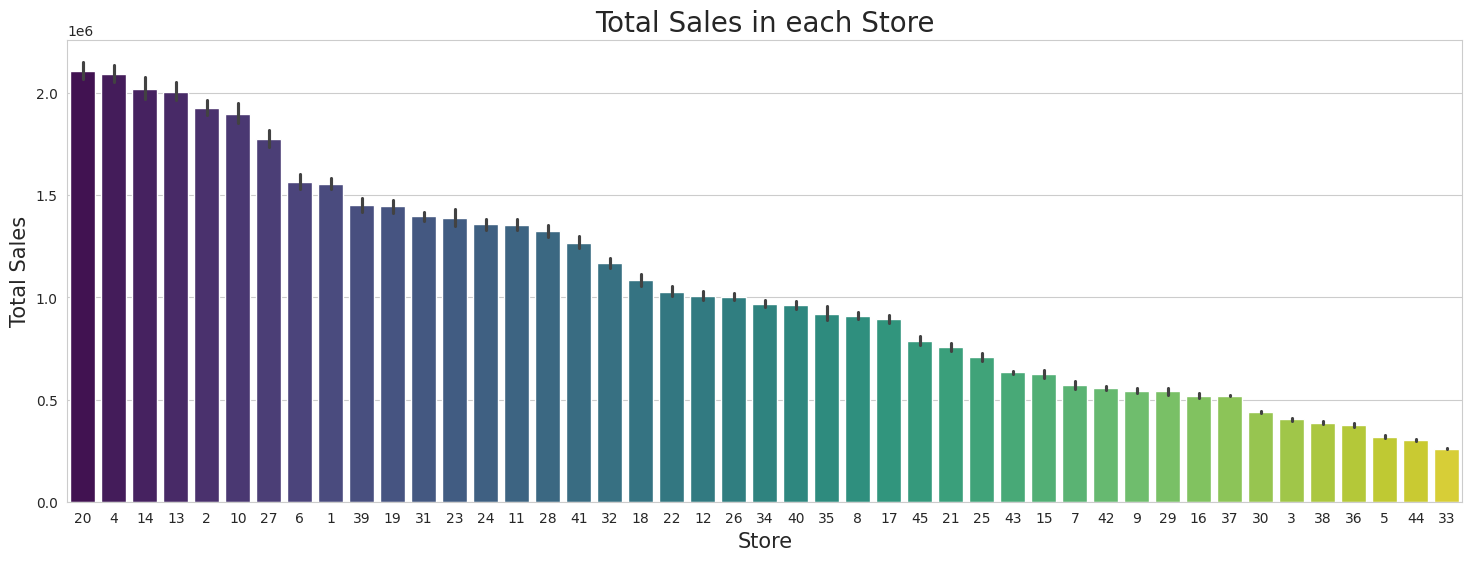

In [143]:
plt.figure(figsize = (18, 6))
sns.barplot(data=data,
            x = 'Store',
            y = 'Weekly_Sales',
            order = grp_store.index,
            palette='viridis')

# Add labels and title
plt.title('Total Sales in each Store', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

* Conclusion:There is a high variance in weekly sales from one store to another. Store No. 20 has the highest sales from any store with 301,397,792 followed by Store No. 4 with 299,543,953 and Store No. 33 comes last with 37,160,222$.

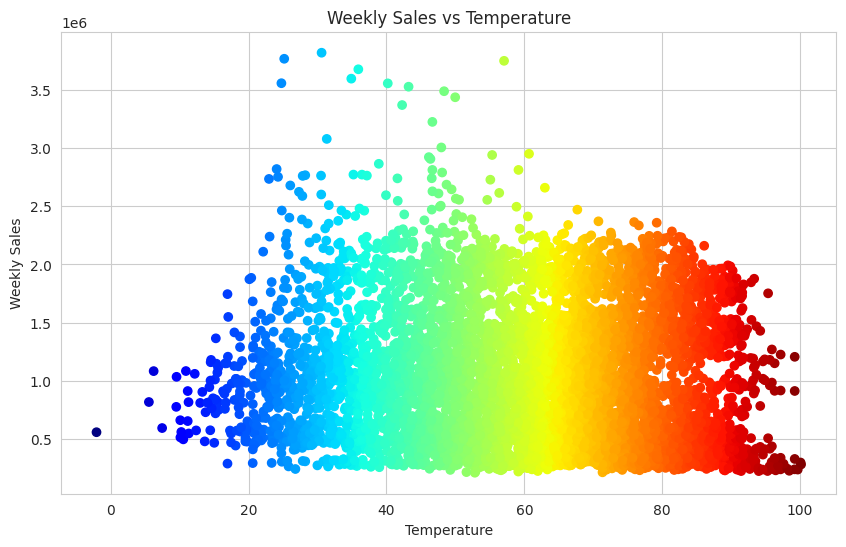

In [144]:
#title Weekly Sales vs Temperature

import matplotlib.pyplot as plt
plt.scatter(data['Temperature'], data['Weekly_Sales'], c=data['Temperature'], cmap='jet')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
_ = plt.title('Weekly Sales vs Temperature')

* Conclusion:Sales are not affected by changes in temperature

## Weekly_Sales And Fule_Price

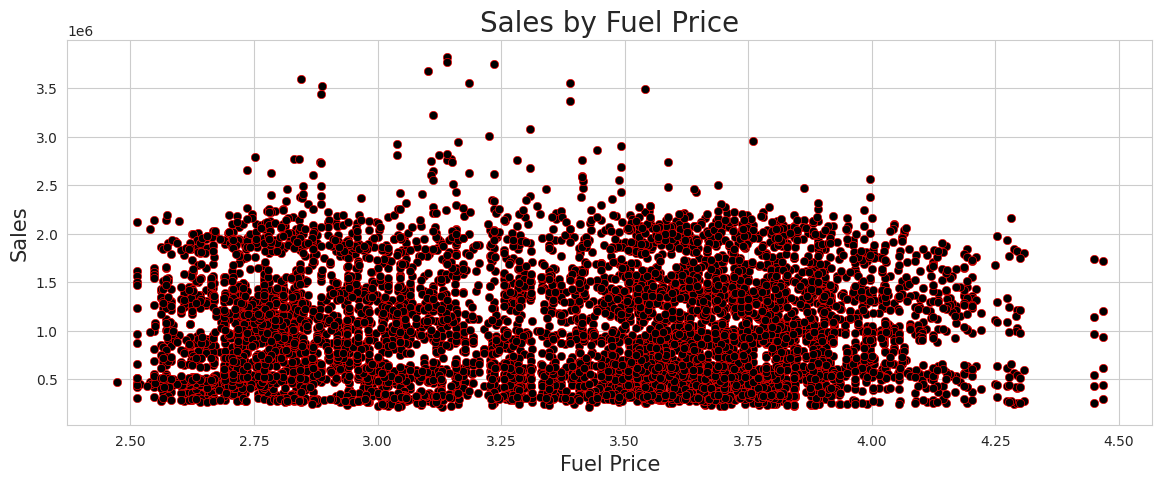

In [145]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = data,
                x = 'Fuel_Price',
                y = 'Weekly_Sales',
                color = 'black',
                edgecolor = "red")

# Add labels and title
plt.title('Sales by Fuel Price', size = 20)
plt.xlabel('Fuel Price', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

* Conclusion:Sales are not affected by an increase in fuel price

## Weekly_Sales And CPI

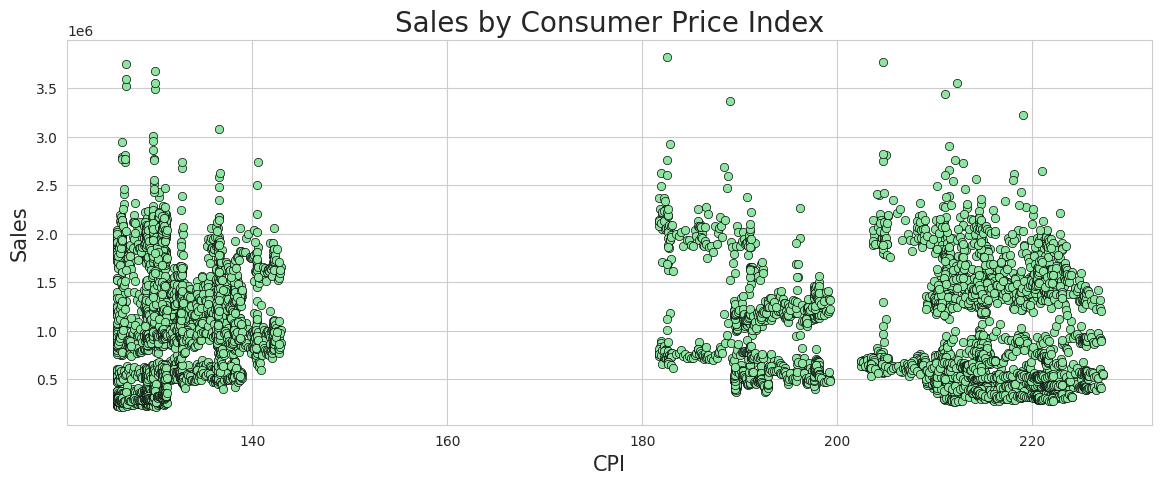

In [146]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = data,
                x = 'CPI',
                y = 'Weekly_Sales',
                color = '#8de5a1',
                edgecolor = "black")

# Add labels and title
plt.title('Sales by Consumer Price Index', size = 20)
plt.xlabel('CPI', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

* Conclusion: Consumer Price Index (CPI) has little impact on sales. Based on the distribution of typical consumer prices in the figure above, clients can be categorized into two groups: clients that pay from 120 and 150 are considered middle-class clients. consumers who pay between 180 and 230 are considered high-class consumers.

## Weekly_Sales And Unemployment

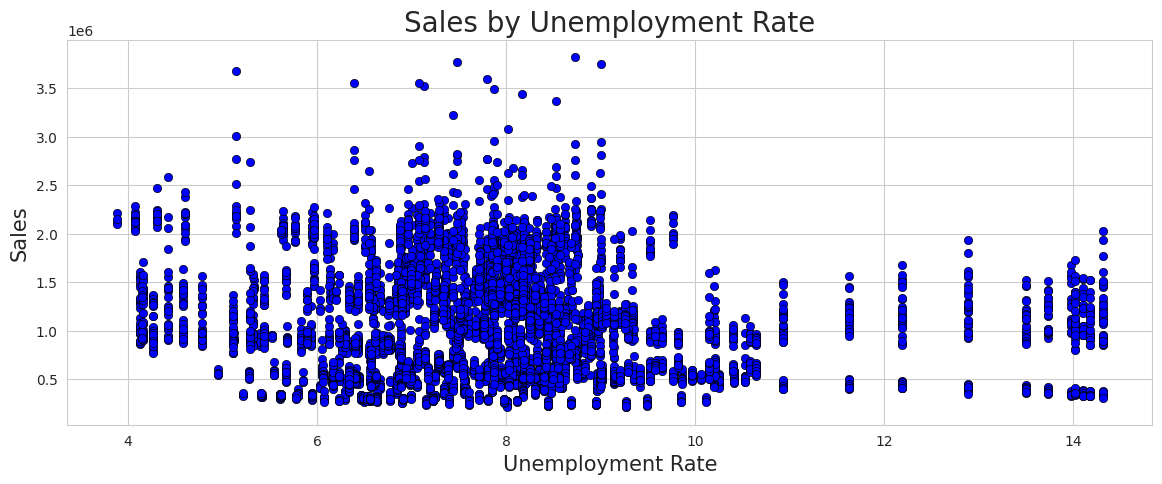

In [147]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = data,
                x = 'Unemployment',
                y = 'Weekly_Sales',
                color = 'blue',
                edgecolor = 'black')

# Add labels and title
plt.title('Sales by Unemployment Rate', size = 20)
plt.xlabel('Unemployment Rate', size = 15)
plt.ylabel('Sales', size = 15)
plt.show()

* Conclusion:Sales are affected by the unemployment rate, so the higher the unemployment rate, the lower the sales.

# Data Correlation

## Fuel Price vs. Weekly Sales

In [148]:
#Let's calculate the Pearson Correlation Coefficient and P-value of 'fuel_price' and 'weekly_sales':
from scipy.stats import pearsonr

# Assuming you have a DataFrame 'data' with columns 'fuel_price' and 'weekly_sales'
pearson_coef, p_value = pearsonr(data['Fuel_Price'], data['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.009463786314475135 with a P-value of P = 0.44782874894858093


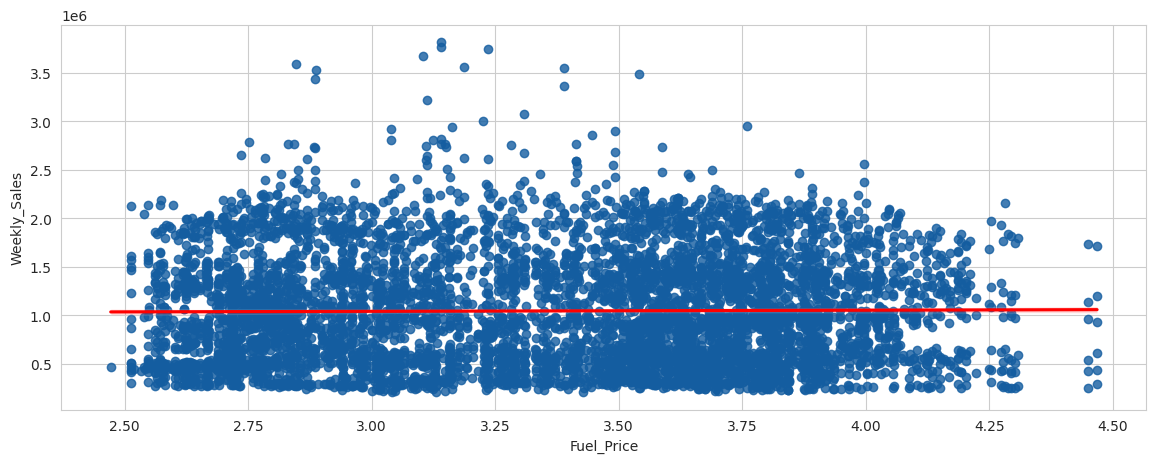

In [149]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'Fuel_Price', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

Conclusion:
* Since the p-value is > 0.1, the correlation between fuel price and weekly sales is not statistically significant.
* Fuel price does not seem like a good predictor of the weekly sales at all since the regression line is close to horizontal. Therefore, it's not a reliable variable

## Unemployment vs. Weekly Sales

In [150]:
pearson_coef, p_value = pearsonr(data['Unemployment'], data['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.10617608965795423 with a P-value of P = 1.3448365210234661e-17


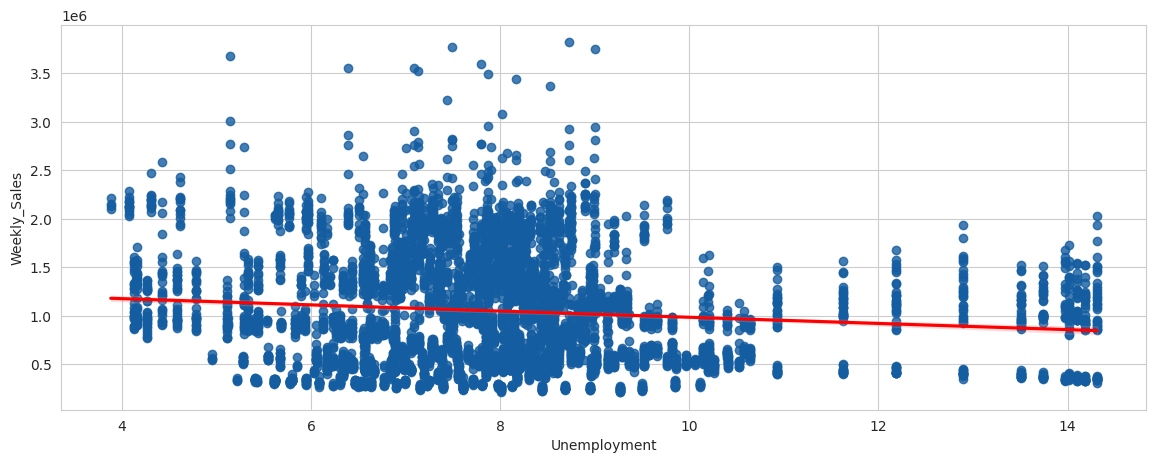

In [151]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'Unemployment', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

Conclusion:
* Since the p-value is < 0.001, the correlation between unemployment and weekly sales is strong evidence that the correlation is significant.
* Unemployment seems like a good predictor of the weekly sales, The higher the unemployment rate, the lower the weekly sales

## CPI vs. Weekly Sales

In [152]:
pearson_coef, p_value = pearsonr(data['CPI'], data['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.07263416204017623 with a P-value of P = 5.438292612176735e-09


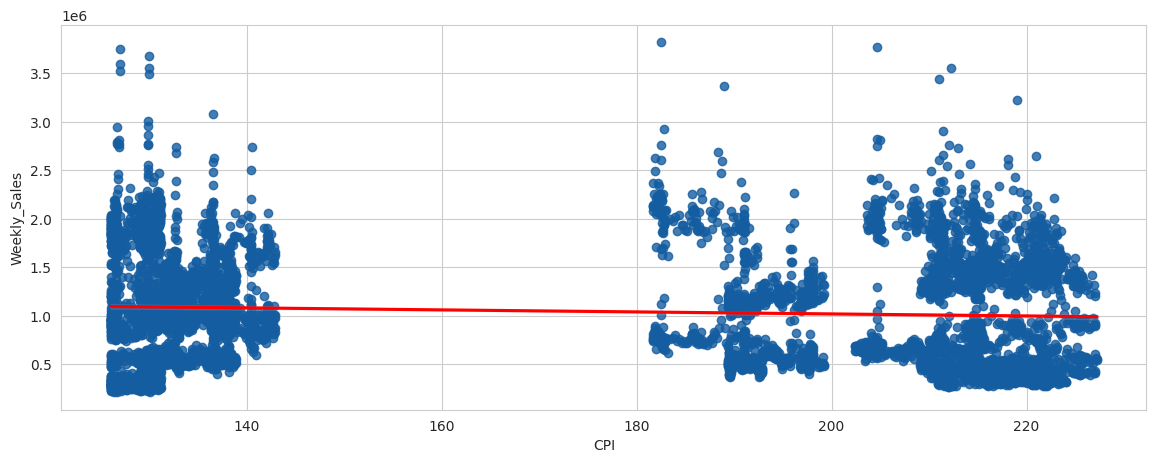

In [153]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'CPI', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

* Conclusion:Since the p-value is < 0.001, the correlation between CPI and weekly sales is strong evidence that the correlation is significant

## Temperature vs. Weekly Sales

In [154]:
pearson_coef, p_value = pearsonr(data['Temperature'], data['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.06381001317946956 with a P-value of P = 3.007647625833226e-07


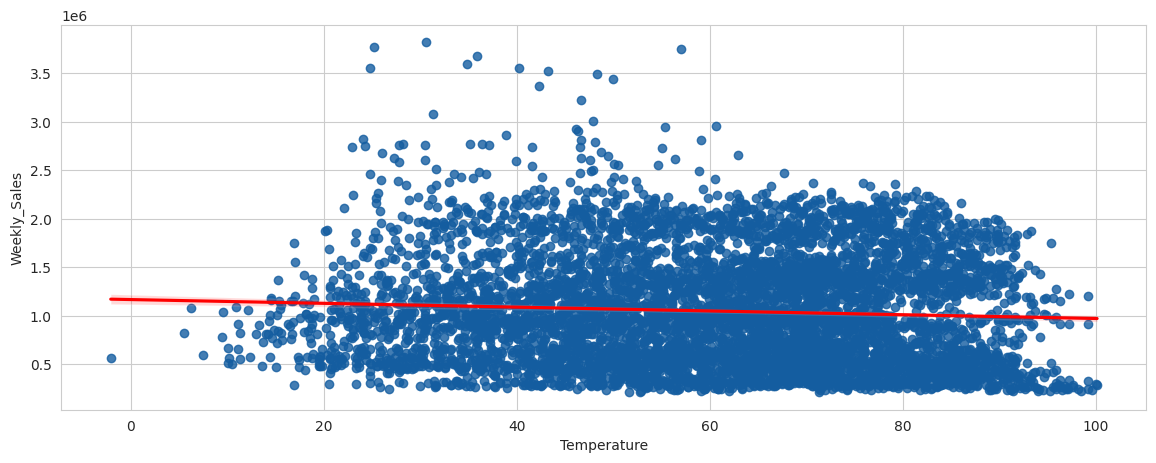

In [155]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'Temperature', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

Conclusion:

* Since the p-value is < 0.05, the correlation between temperature and weekly sales is moderate evidence that the correlation is significant.
* Temperature seems like a good predictor of the weekly sales, The higher the Temperature rate, the lower the weekly sales.

## Data Correlation Analysis

In [156]:
# Correlations with weekly sales
corr = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()['Weekly_Sales'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,Weekly_Sales
Weekly_Sales,1.000000
Fuel_Price,0.009464
Temperature,-0.063810
CPI,-0.072634
Unemployment,-0.106176


* The correlation analysis shows only weak relationships between Weekly Sales and the studied factors. Fuel prices have an almost negligible positive correlation, suggesting limited impact on sales. Temperature, CPI, and Unemployment are all negatively correlated with Weekly Sales, with Unemployment showing the strongest negative relationship, though it is still weak. These factors alone are unlikely to be strong predictors of Weekly Sales.

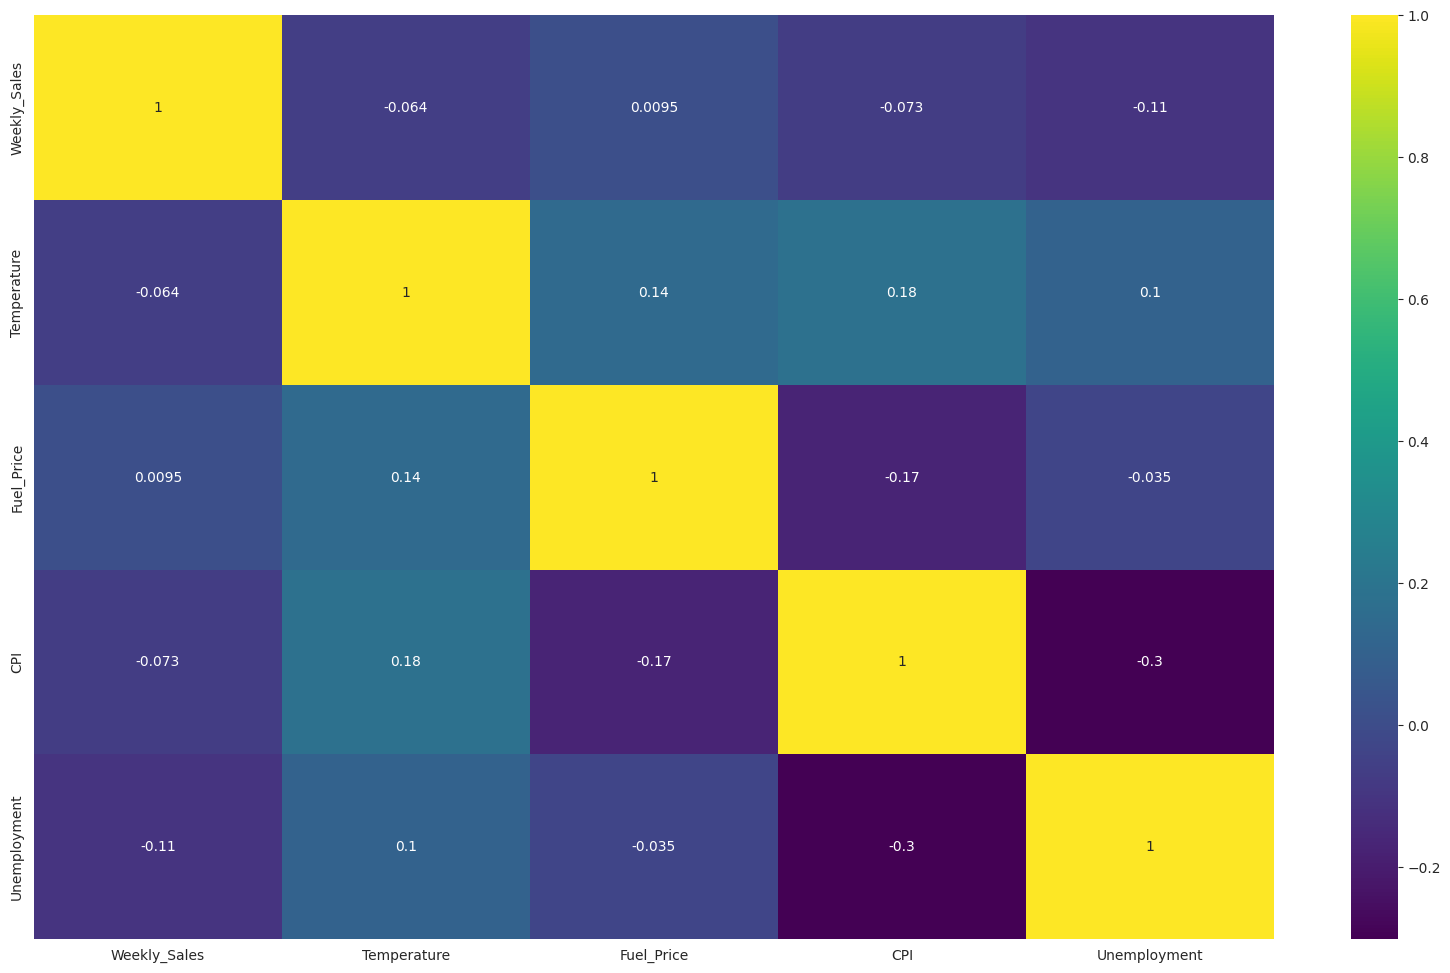

In [157]:
plt.figure(figsize = (20, 12))
sns.heatmap(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(), annot = True, cmap='viridis')
plt.show()

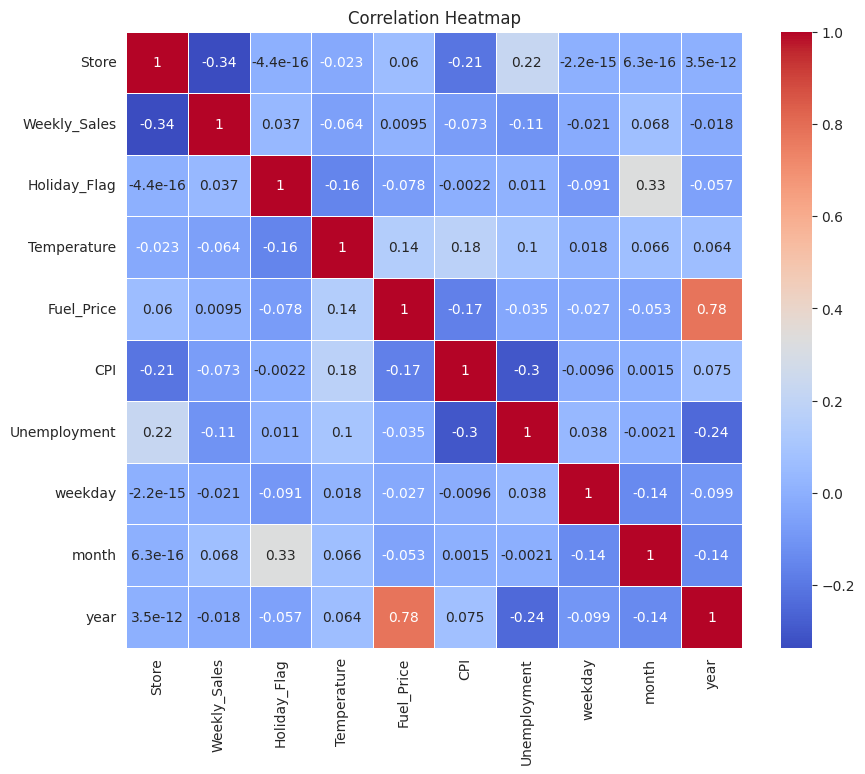

In [158]:
# Correlation Analysis
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Pre-processing

In [159]:
data_new = data.copy() ### taking caopy of the dataset

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
 10  month_name    6435 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 553.1+ KB


In [161]:
data_new.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
weekday           int64
month             int64
year              int64
month_name       object
dtype: object

0 Fuel_Price
1 Temperature
2 CPI
3 Unemployment


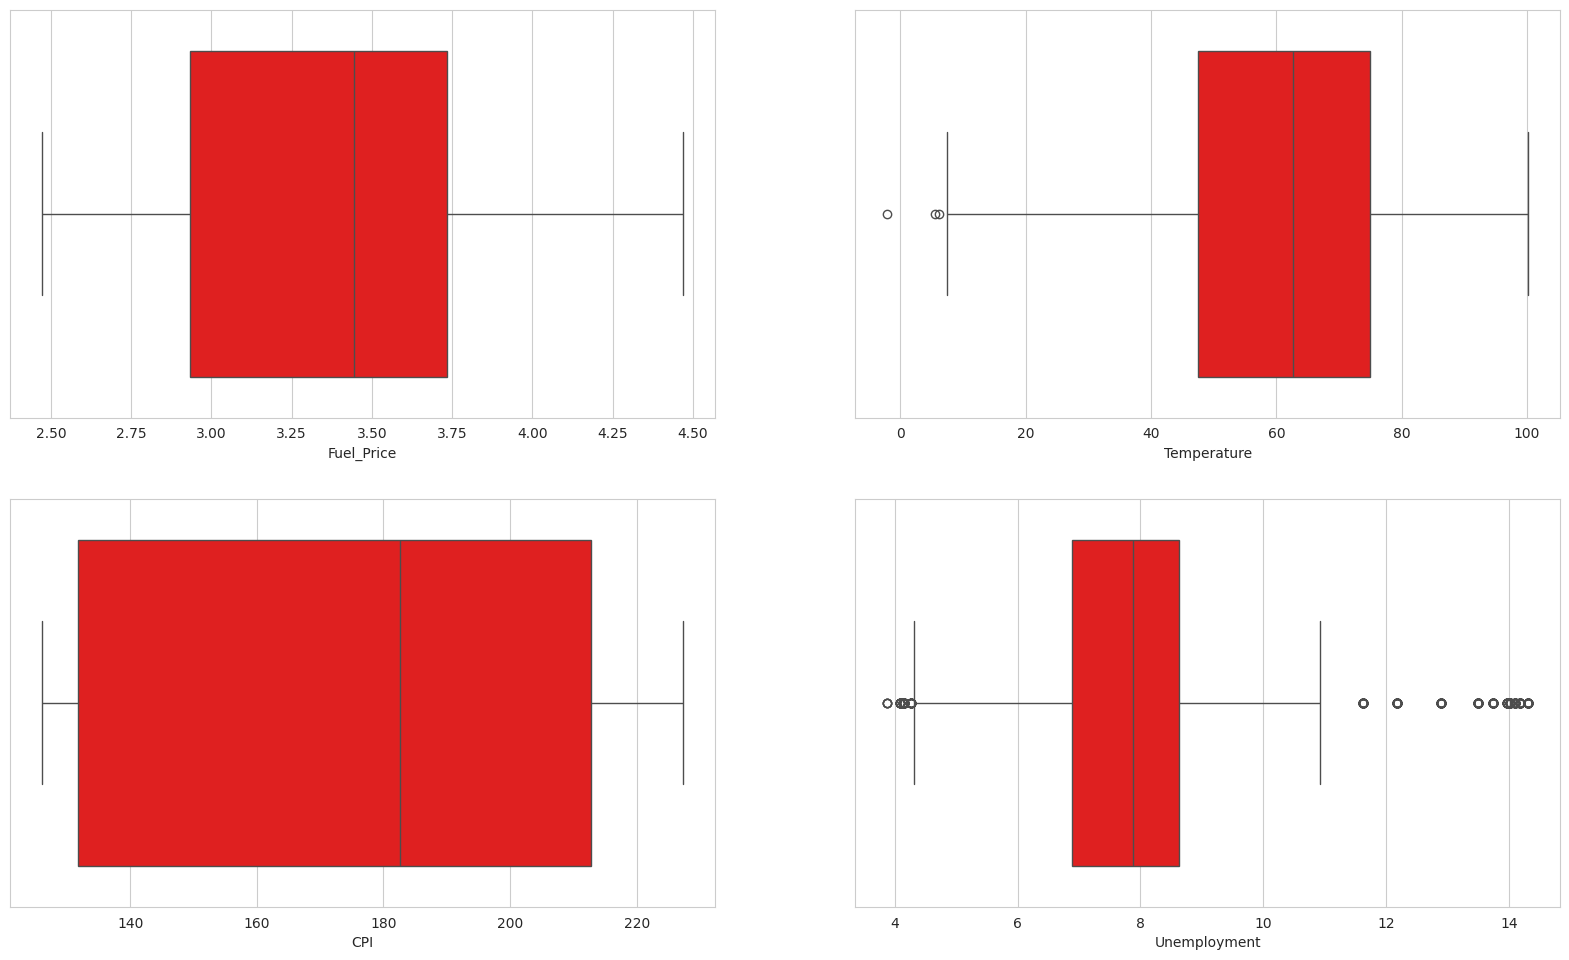

Number of data rows:  6435


In [162]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_new, x = col, color = 'red')
plt.show()

print('Number of data rows: ', data_new.shape[0])

In [163]:
# Remove outliers from the temperature column
data_new.drop(data_new[data_new['Temperature'] < 7].index, axis = 0, inplace = True)

In [164]:
# Remove outliers from the unemployment column
data_new.drop(data_new[data_new['Unemployment'] < 4.4].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['Unemployment'] > 11].index, axis = 0, inplace = True)

0 Temperature
1 Fuel_Price
2 CPI
3 Unemployment


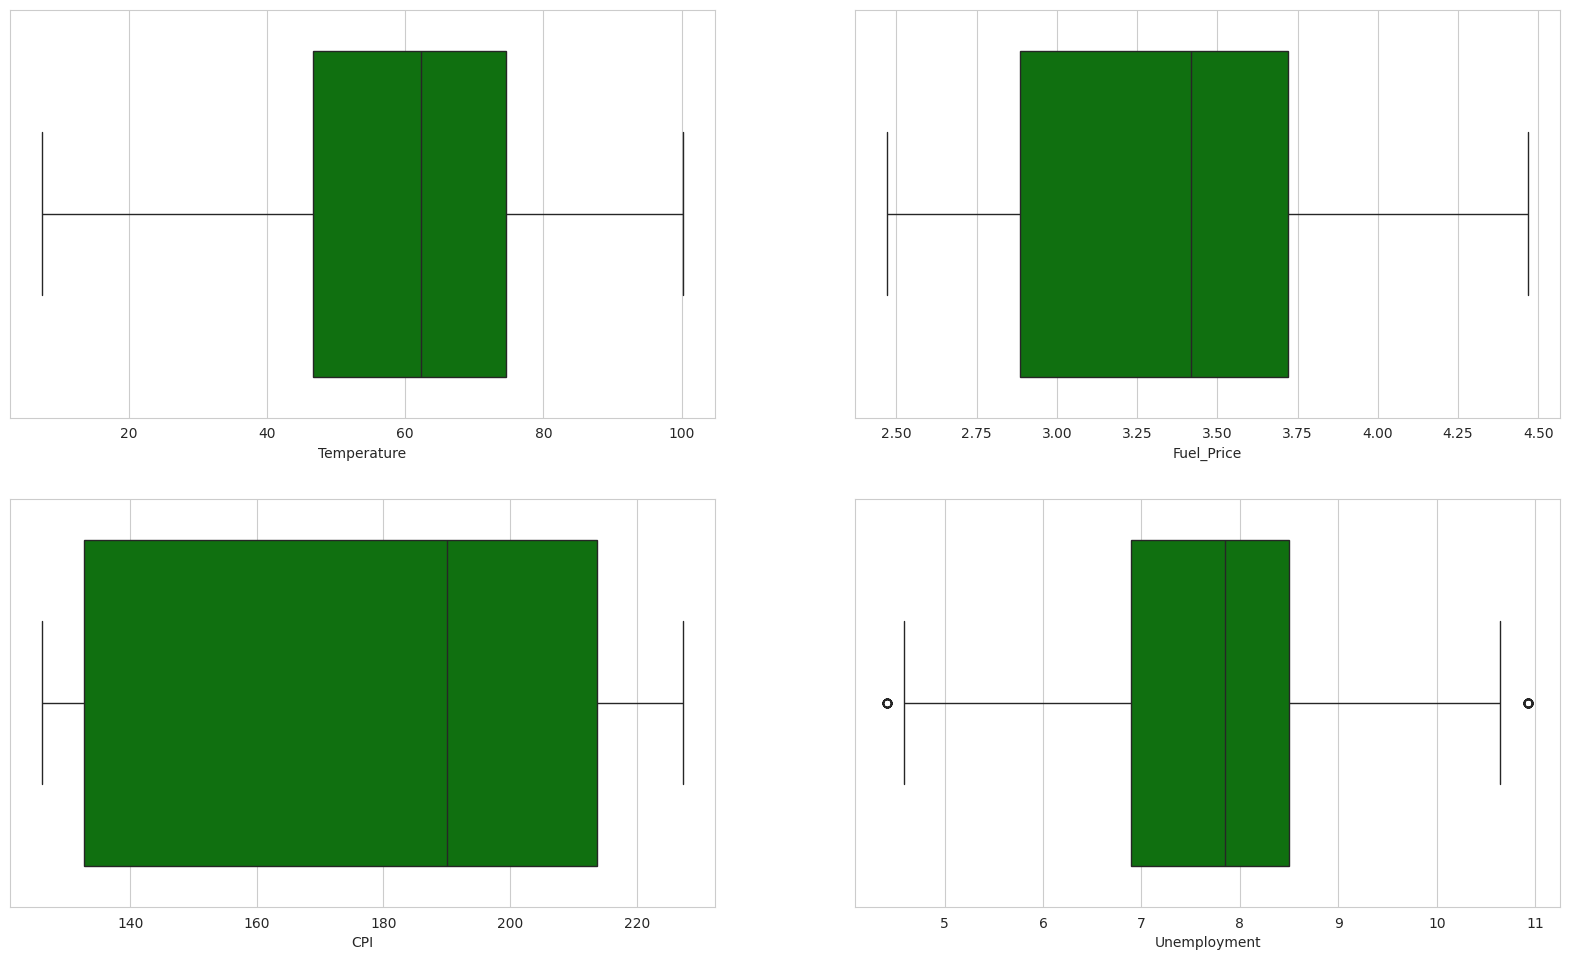

Number of data rows:  5938


In [165]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(20,18))
for i, col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_new, x = col, color = 'g')
plt.show()

print('Number of data rows: ', data_new.shape[0])

In [166]:
# save your cleaned data into a CSV file using pandas
data.to_csv('cleaned_walmart.csv', index=False)